In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore 


import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.visualization.utils as ut
import visual_behavior.data_access.loading as loading
import visual_behavior.visualization.ophys.summary_figures as sf 
import visual_behavior.ophys.response_analysis.utilities as utilities
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

### get multi session dataframe for some set of conditions

In [4]:
experiments_table = loading.get_filtered_ophys_experiment_table() 
experiments_table = experiments_table[experiments_table.session_number.isin([2,5])==False]

In [5]:
cache_dir = loading.get_analysis_cache_dir()

df_name = 'stimulus_response_df' 
conditions = ['cell_specimen_id', 'image_name', 'running', 'engagement_state']
project_codes = ['VisualBehaviorMultiscope']
experiments = experiments_table[experiments_table.project_code.isin(project_codes)]

stim_multi_session_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments)

In [6]:
stim_multi_session_df.head()

,cell_specimen_id,image_name,running,engagement_state,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,...,session_tags,failure_tags,exposure_number,model_outputs_available,location,session_number,depth,layer,location_layer,cre
0,1018066507,im077,True,disengaged,0.003239,0.002107,"[-0.0022820354974102176, 0.005726246495481483,...","[0.004753414788929895, 0.005532173307955916, 0...","[-0.03577944484263857, -0.016456892762298007, ...",0.000923,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
1,1018066507,im077,True,engaged,0.005387,0.002227,"[0.0047552269633402075, 0.00878015073845413, 0...","[0.003235480612780628, 0.00488963123328273, 0....","[0.02660453425048512, 0.054773999861609614, 0....",-0.000860,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
2,1018066514,im062,True,disengaged,0.011619,0.003837,"[0.021390808448660818, 0.026239311765995886, 0...","[0.008717160685365067, 0.008225344283745722, 0...","[0.17033764471400045, 0.05205288037173642, -0....",-0.006207,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
3,1018066514,im062,True,engaged,0.019283,0.008543,"[0.03668859210307512, 0.02520556647430716, 0.0...","[0.0133181122951639, 0.014592671584837548, 0.0...","[0.06923603709931585, 0.035204720363293966, 0....",0.009401,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
4,1018066539,im061,True,disengaged,1.035239,0.050326,"[0.7425496500666695, 0.48464740946647045, 0.44...","[0.05617305329199191, 0.05041030499232482, 0.0...","[-0.12225020376056506, 1.3949495949201098, 0.9...",1.302647,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7


In [7]:
cache_dir = loading.get_analysis_cache_dir()

df_name = 'trials_response_df' 
conditions = ['cell_specimen_id', 'go' , 'change_image_name', 'running', 'engagement_state']
project_codes = ['VisualBehaviorMultiscope']
experiments = experiments_table[experiments_table.project_code.isin(project_codes)]

change_multi_session_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments)


In [8]:
change_multi_session_df.head()

,cell_specimen_id,go,change_image_name,running,engagement_state,mean_response,sem_response,mean_trace,sem_trace,mean_responses,...,session_tags,failure_tags,exposure_number,model_outputs_available,location,session_number,depth,layer,location_layer,cre
0,1018066507,False,im063,True,disengaged,0.007772,0.011196,"[0.024357906145279728, -0.0451098836981, 0.040...","[0.038957345763659924, 0.0014871450661617218, ...","[-0.008062320022582016, 0.023605916310527067]",...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
1,1018066507,False,im063,True,engaged,-0.012471,0.002163,"[-0.02274725122673445, -0.00141641951043518, 0...","[0.011933508087667109, 0.013644934102682226, 0...","[-0.010681104936712727, -0.01768481245215256, ...",...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
2,1018066507,True,im063,False,engaged,0.072530,0.000000,"[0.08147257113092185, -0.018369182374030336, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.07252977724028477],...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
3,1018066507,True,im063,True,disengaged,0.012292,0.007922,"[-0.03711913189014072, -0.004456256106990715, ...","[0.014253709114741438, 0.027442975131678846, 0...","[0.062243170780022644, -0.0002037576361067408,...",...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
4,1018066507,True,im063,True,engaged,0.007909,0.005318,"[0.012217358479794502, 0.00810237282181974, -0...","[0.011457810005839116, 0.015159254062264177, 0...","[0.014446231585072626, 0.04060957295854393, 0....",...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7


In [9]:
cache_dir = loading.get_analysis_cache_dir()

df_name = 'omission_response_df' 
conditions = ['cell_specimen_id', 'running', 'engagement_state']
project_codes = ['VisualBehaviorMultiscope']
experiments = experiments_table[experiments_table.project_code.isin(project_codes)]

omission_multi_session_df = loading.get_multi_session_df(cache_dir, df_name, conditions, experiments)


In [10]:
omission_multi_session_df.head()

,cell_specimen_id,running,engagement_state,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,...,session_tags,failure_tags,exposure_number,model_outputs_available,location,session_number_y,depth,layer,location_layer,cre
0,1018066507,False,engaged,0.016390,0.007537,"[-0.002217556100145398, -0.0036263654861757116...","[0.01218461716928435, 0.014033782829989178, 0....","[-0.014409843399305178, -0.011587322708399591,...",0.007988,0.004772,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
1,1018066507,True,disengaged,-0.001363,0.003050,"[0.003706237509638441, -0.0008813562998791111,...","[0.008431210838153697, 0.0073158210264377, 0.0...","[-0.0130039913766363, -0.009624402806980105, -...",0.001447,0.002771,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
2,1018066507,True,engaged,-0.002135,0.001985,"[0.01094933519161757, 0.00526564687595182, 0.0...","[0.005058709746348743, 0.004900056861915289, 0...","[0.012077502045235979, -0.010154861766406112, ...",0.001017,0.001821,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
3,1018066514,False,engaged,-0.004102,0.004703,"[0.006139713972124044, 0.0051114660194752975, ...","[0.012664311290178485, 0.011878757613379743, 0...","[-0.015508915551001994, -0.01640884079440091, ...",0.001523,0.005311,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7
4,1018066514,True,disengaged,0.003457,0.003432,"[0.02693480449126048, -0.009874275563784791, 0...","[0.010888253111622392, 0.011110420099503231, 0...","[0.00928687617082118, 0.013785784911042554, -0...",0.000370,0.004682,...,NaN,NaN,0,True,Excitatory superficial,1,superficial,L3,Slc17a7_VISp_L3,Slc17a7


### create concatenated traces for all cells  

In [11]:
image_df = stim_multi_session_df.copy()
image_df = image_df[(image_df.running==True)&(image_df.engagement_state=='engaged')]
image_resp_cells = image_df[image_df.fraction_significant_p_value_gray_screen>0.2].cell_specimen_id.unique()
print(len(image_df), len(image_resp_cells))

omission_df = omission_multi_session_df.copy()
omission_df = omission_df[(omission_df.running==True)&(omission_df.engagement_state=='engaged')]
omission_resp_cells = omission_df[omission_df.fraction_significant_p_value_gray_screen>0.2].cell_specimen_id.unique()
print(len(omission_df), len(omission_resp_cells))

change_df = change_multi_session_df.copy()
change_df = change_df[(change_df.go==True)&(change_df.running==True)&(change_df.engagement_state=='engaged')]
change_resp_cells = change_df[change_df.fraction_significant_p_value_gray_screen>0.2].cell_specimen_id.unique()
print(len(change_df), len(change_resp_cells))


18373 3861
17531 429
18088 4512


In [12]:
image_data = image_df[['cell_specimen_id', 'ophys_experiment_id', 'mean_trace', 'mean_response']]
image_data = image_data.rename(columns={'mean_trace':'image_trace', 'mean_response':'image_response'})
omission_data = omission_df[['cell_specimen_id', 'ophys_experiment_id', 'mean_trace', 'mean_response']]
omission_data = omission_data.rename(columns={'mean_trace':'omission_trace', 'mean_response':'omission_response'})
change_data = change_df[['cell_specimen_id', 'ophys_experiment_id', 'mean_trace', 'mean_response']]
change_data = change_data.rename(columns={'mean_trace':'change_trace', 'mean_response':'change_response'})

In [13]:
data = image_data.merge(omission_data, on=['cell_specimen_id', 'ophys_experiment_id'])
data = data.merge(change_data, on=['cell_specimen_id', 'ophys_experiment_id'])
data.shape

(17273, 8)

In [14]:
# add metadata to df
data = data.merge(experiments_table, on='ophys_experiment_id')

#### limit to cells that are responsive to at least one condition (image, change or omission)

In [15]:
cells_to_include = np.unique(np.hstack((image_resp_cells, omission_resp_cells, change_resp_cells)))
print(len(stim_multi_session_df.cell_specimen_id.unique()), len(cells_to_include))

12210 5666


In [16]:
data = data[data.cell_specimen_id.isin(cells_to_include)]
data.shape

(9030, 36)

### plot feature matrix

In [17]:
def get_cre_index(cre_line):
    if cre_line == 'Slc17a7-IRES2-Cre':
        cre_index = 0
    elif cre_line == 'Sst-IRES-Cre':
        cre_index = 1
    elif cre_line == 'Vip-IRES-Cre':
        cre_index = 2
    return cre_index

data['cre_index'] = [get_cre_index(cre_line) for cre_line in data.cre_line.values]

In [18]:
# function to pull out just the traces matrix from dataframe
def get_concatenated_traces(data):
    concatenated_traces = np.concatenate((np.vstack(data.image_trace.values), np.vstack(data.change_trace.values), np.vstack(data.omission_trace.values)), axis=1)
    print(concatenated_traces.shape)
    return concatenated_traces

In [19]:
cre_lines = np.sort(data.cre_line.unique())

In [20]:
len_images = image_df.mean_trace.values[0].shape[0]
len_changes= change_df.mean_trace.values[0].shape[0]
len_omissions = omission_df.mean_trace.values[0].shape[0]

#### dFF traces

(6874, 227)
(729, 227)
(1427, 227)


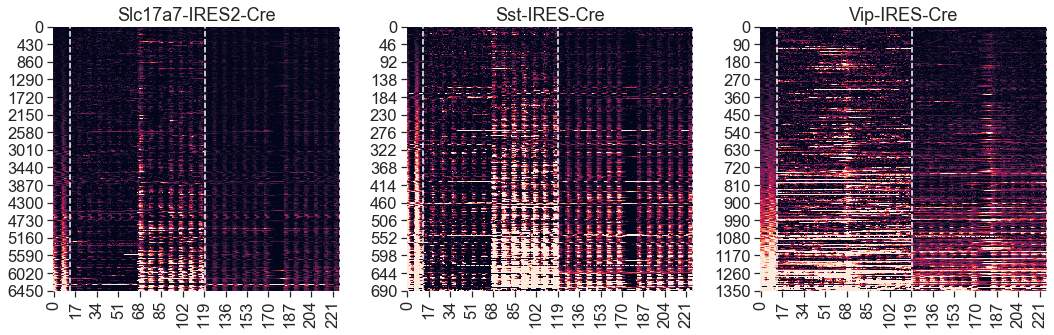

In [21]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax = ax.ravel()
for i,cre_line in enumerate(cre_lines):
    order = np.argsort(data[data.cre_line==cre_line].image_response.values)
    concatenated_traces = get_concatenated_traces(data[data.cre_line==cre_line])
    concatenated_traces = concatenated_traces[order, :]
    ax[i] = sns.heatmap(data=concatenated_traces, vmin=0, vmax=0.3, ax=ax[i], cbar=False)
    ax[i].set_title(cre_line)
    ax[i].axvline(x=len_images, ymin=0, ymax=1, color='white', linestyle='--')
    ax[i].axvline(x=len_images+len_changes, ymin=0, ymax=1, color='white', linestyle='--')
    ax[i].axvline(x=len_images+len_changes+len_omissions, ymin=0, ymax=1, color='white', linestyle='--')
fig.tight_layout()

#### z-scored traces

(6874, 227)
(729, 227)
(1427, 227)


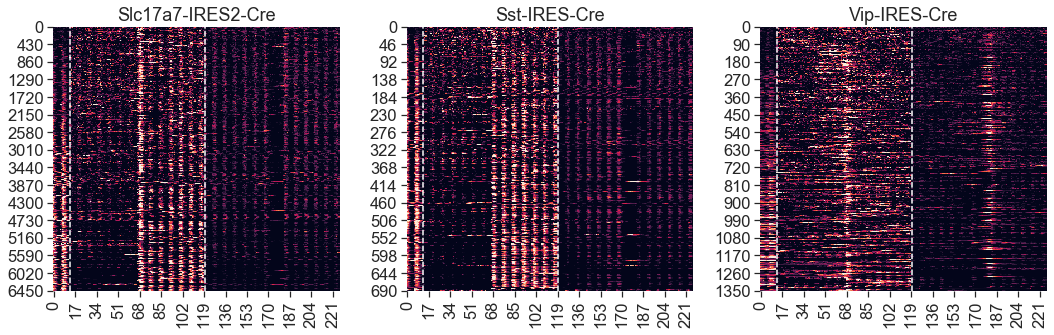

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax = ax.ravel()
for i,cre_line in enumerate(cre_lines):
    order = np.argsort(data[data.cre_line==cre_line].image_response.values)
    concatenated_traces = get_concatenated_traces(data[data.cre_line==cre_line])
    concatenated_traces = concatenated_traces[order, :]
    normed_traces = zscore(concatenated_traces, axis=1)
    ax[i] = sns.heatmap(data=normed_traces, vmin=0, vmax=3, ax=ax[i], cbar=False)
    ax[i].set_title(cre_line)
    ax[i].axvline(x=len_images, ymin=0, ymax=1, color='white', linestyle='--')
    ax[i].axvline(x=len_images+len_changes, ymin=0, ymax=1, color='white', linestyle='--')
fig.tight_layout()

### run PCA on dFF traces

In [23]:
import visual_behavior.clustering.multiscope_fn.def_funs as funs

(9030, 227)
Running PCA on matrix size: (9030, 227)
(9030, 6)


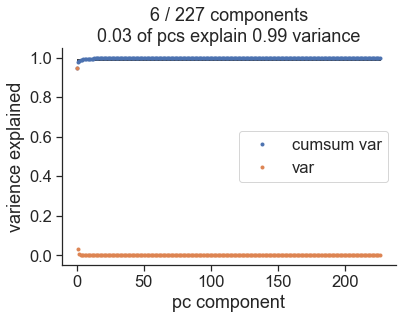

In [24]:
concatenated_traces = get_concatenated_traces(data)

from sklearn.decomposition import PCA
varexpmax = .99 # 1 # .9

pc_all_cre = {}
pca_variance_all_cre = {}

print(f'Running PCA on matrix size: {np.shape(concatenated_traces)}')

x_train_pc, pca = funs.doPCA(concatenated_traces, varexpmax=varexpmax, doplot=1)
pca_variance = pca.explained_variance_ratio_
#     x_train_pc.shape

pc_all_cre = x_train_pc
pca_variance_all_cre = pca_variance


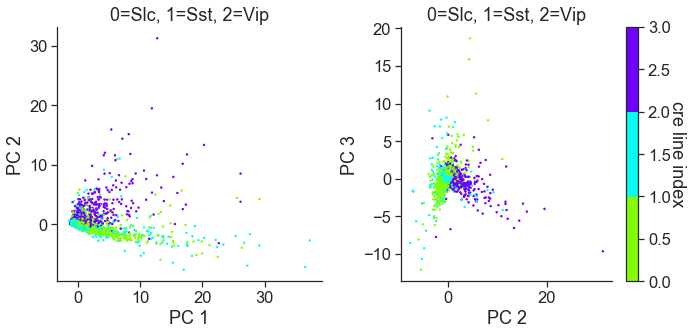

In [25]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

c_value = data.cre_index.values
vmin = 0
vmax = 3
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 3).as_hex())

for i,dim in enumerate(np.arange(1,3)):
    x = pc_all_cre[:, dim]
    y = pc_all_cre[:, dim+1]

    cax = ax[i].scatter(x, y, s=2, marker='o', c=c_value, cmap=cmap, vmin=vmin, vmax=vmax)
    
    ax[i].set_xlabel('PC '+str(dim))
    ax[i].set_ylabel('PC '+str(dim+1))
    ax[i].set_title('0=Slc, 1=Sst, 2=Vip')
#     ax[i].set_xlim(-5,20)
#     ax[i].set_ylim(-5,20)

cbar = plt.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('cre line index', rotation=270)
fig.tight_layout()

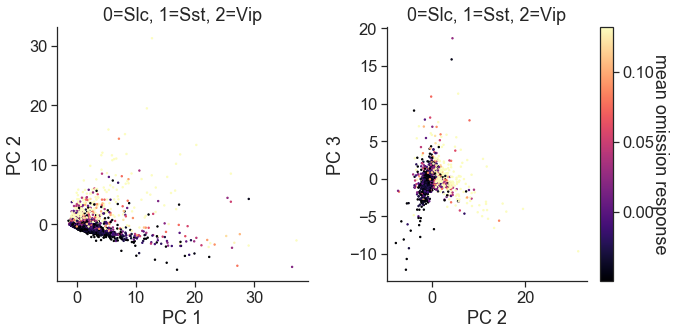

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

c_value = data.omission_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)

for i,dim in enumerate(np.arange(1,3)):
    x = pc_all_cre[:, dim]
    y = pc_all_cre[:, dim+1]

    cax = ax[i].scatter(x, y, s=2, marker='o', c=c_value, cmap='magma', vmin=vmin, vmax=vmax)
    
    ax[i].set_xlabel('PC '+str(dim))
    ax[i].set_ylabel('PC '+str(dim+1))
    ax[i].set_title('0=Slc, 1=Sst, 2=Vip')

cbar = plt.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('mean omission response', rotation=270)
fig.tight_layout()

### run PCA on z-scored traces

(9030, 227)
Running PCA on matrix size: (9030, 227)
(9030, 196)


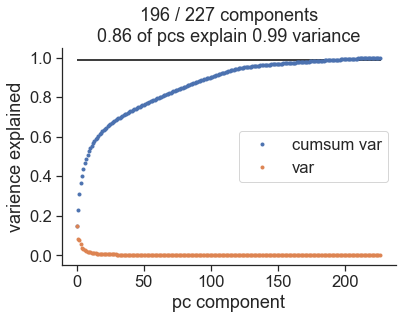

In [27]:
concatenated_traces = get_concatenated_traces(data)
concatenated_traces = zscore(concatenated_traces, axis=1)

from sklearn.decomposition import PCA
varexpmax = .99 # 1 # .9

pc_all_cre = {}
pca_variance_all_cre = {}

print(f'Running PCA on matrix size: {np.shape(concatenated_traces)}')

x_train_pc, pca = funs.doPCA(concatenated_traces, varexpmax=varexpmax, doplot=1)
pca_variance = pca.explained_variance_ratio_
#     x_train_pc.shape

pc_all_cre = x_train_pc
pca_variance_all_cre = pca_variance


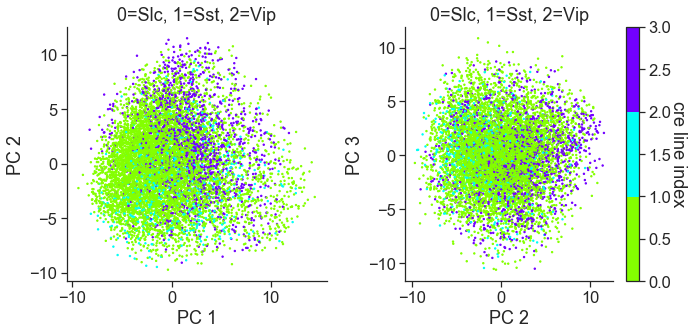

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

c_value = data.cre_index.values
vmin = 0
vmax = 3
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 3).as_hex())

for i,dim in enumerate(np.arange(1,3)):
    x = pc_all_cre[:, dim]
    y = pc_all_cre[:, dim+1]

    cax = ax[i].scatter(x, y, s=2, marker='o', c=c_value, cmap=cmap, vmin=vmin, vmax=vmax)
    
    ax[i].set_xlabel('PC '+str(dim))
    ax[i].set_ylabel('PC '+str(dim+1))
    ax[i].set_title('0=Slc, 1=Sst, 2=Vip')
#     ax[i].set_xlim(-5,20)
#     ax[i].set_ylim(-5,20)

cbar = plt.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('cre line index', rotation=270)
fig.tight_layout()

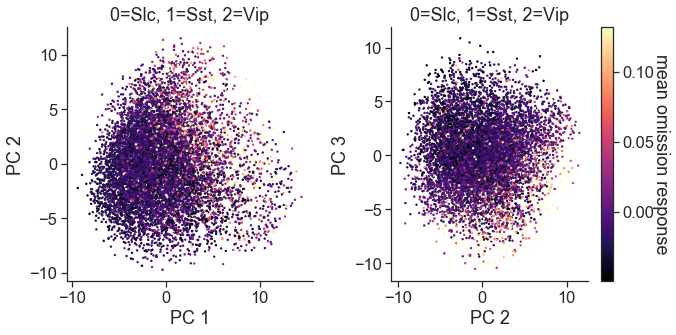

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

c_value = data.omission_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)

for i,dim in enumerate(np.arange(1,3)):
    x = pc_all_cre[:, dim]
    y = pc_all_cre[:, dim+1]

    cax = ax[i].scatter(x, y, s=2, marker='o', c=c_value, cmap='magma', vmin=vmin, vmax=vmax)
    
    ax[i].set_xlabel('PC '+str(dim))
    ax[i].set_ylabel('PC '+str(dim+1))
    ax[i].set_title('0=Slc, 1=Sst, 2=Vip')

cbar = plt.colorbar(cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('mean omission response', rotation=270)
fig.tight_layout()

### run UMAP on dFF traces

In [30]:
import umap    
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

concatenated_traces = get_concatenated_traces(data)

ncomp = 3 # 3 # number of umap components

embedding_all_cre = {}

print(f'Running UMAP')

min_dist=0
sp = 1
neigh = 7
embedding = umap.UMAP(spread=sp, n_neighbors=neigh, n_components=ncomp, 
                      min_dist=min_dist, metric='euclidean').fit_transform(concatenated_traces)
print(f'embedding size: {embedding.shape}')

(9030, 227)
Running UMAP
embedding size: (9030, 3)


#### color by cre_line

In [31]:
def plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label=None, title=None):
    """plots 3 components against each other in pairs - embedding must be 3 dimensional or greater"""
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax = ax.ravel()

    for i in range(2):
        x = embedding[:, i]
        y = embedding[:, i+1]

        cax = ax[i].scatter(x, y, s=2, marker='o', c=c_value, cmap=cmap, vmin=vmin, vmax=vmax)

        ax[i].set_xlabel('UMAP component '+str(i))
        ax[i].set_ylabel('UMAP component '+str(i+1))
        ax[i].set_title(title)

    cbar = plt.colorbar(cax)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(label, rotation=270)
    fig.tight_layout()

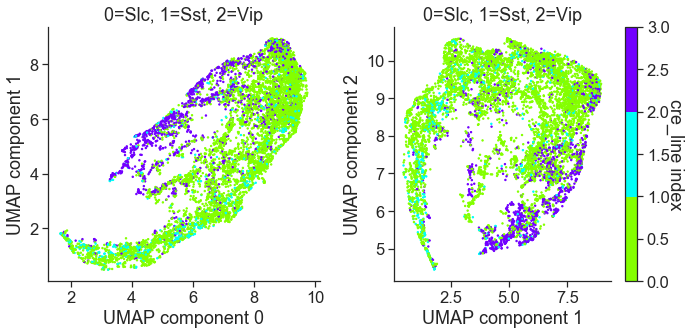

In [32]:
data['cre_index'] = [get_cre_index(cre_line) for cre_line in data.cre_line.values]

c_value = data.cre_index.values
vmin = 0
vmax = 3
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 3).as_hex())
title = '0=Slc, 1=Sst, 2=Vip'
label = 'cre_line index'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

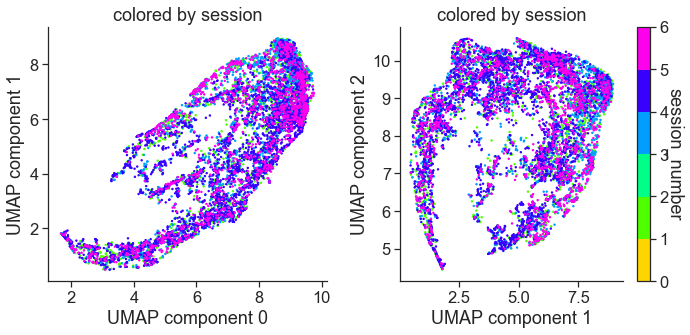

In [33]:
data.session_number = [int(session_type[6]) for session_type in data.session_type.values]
c_value = data.session_number.values
vmin = 0
vmax = 6
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 6).as_hex())
title = 'colored by session'
label = 'session_number'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

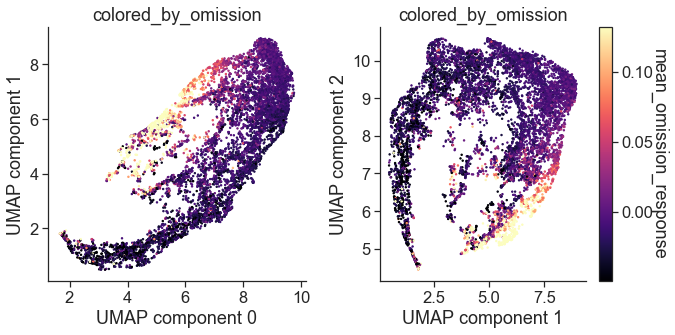

In [34]:
c_value = data.omission_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
label = 'mean_omission_response'
title = 'colored_by_omission'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

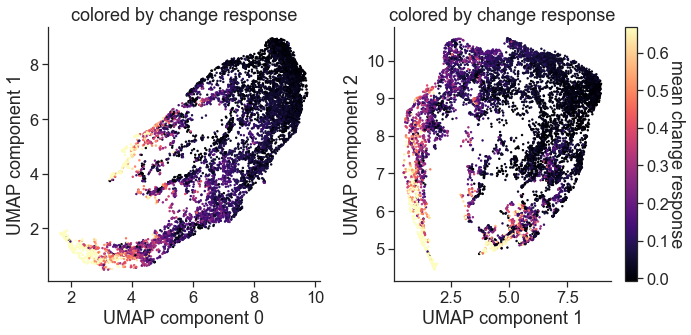

In [35]:
c_value = data.change_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
title = 'colored by change response'
label = 'mean change response'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

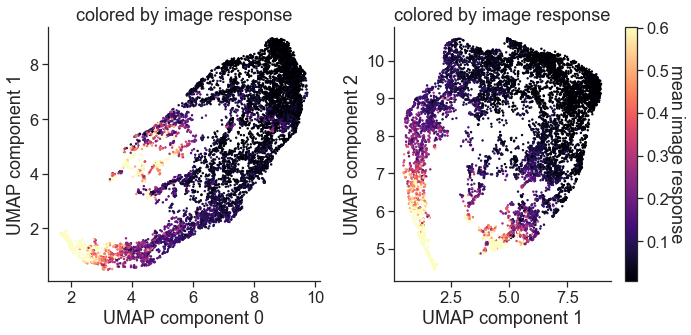

In [36]:
c_value = data.image_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
title = 'colored by image response'
label = 'mean image response'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

### run UMAP on z-scored traces

In [37]:
import umap    
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

concatenated_traces = get_concatenated_traces(data)
concatenated_traces = zscore(concatenated_traces, axis=1)

ncomp = 3 # 3 # number of umap components

embedding_all_cre = {}

print(f'Running UMAP')

min_dist=0
sp = 5
neigh = 10
metric = 'euclidean'
embedding = umap.UMAP(spread=sp, n_neighbors=neigh, n_components=ncomp, 
                      min_dist=min_dist, metric=metric).fit_transform(concatenated_traces)
print(f'embedding size: {embedding.shape}')

(9030, 227)
Running UMAP
embedding size: (9030, 3)


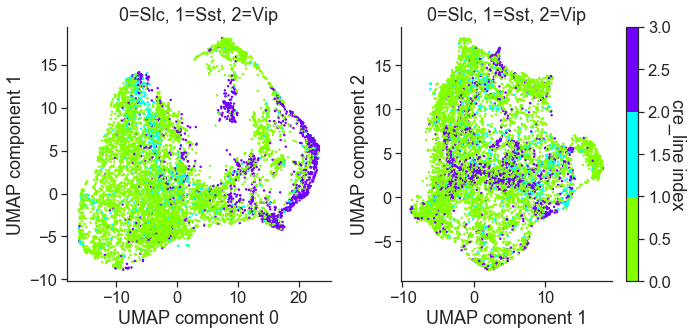

In [38]:
data['cre_index'] = [get_cre_index(cre_line) for cre_line in data.cre_line.values]

c_value = data.cre_index.values
vmin = 0
vmax = 3
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 3).as_hex())
title = '0=Slc, 1=Sst, 2=Vip'
label = 'cre_line index'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

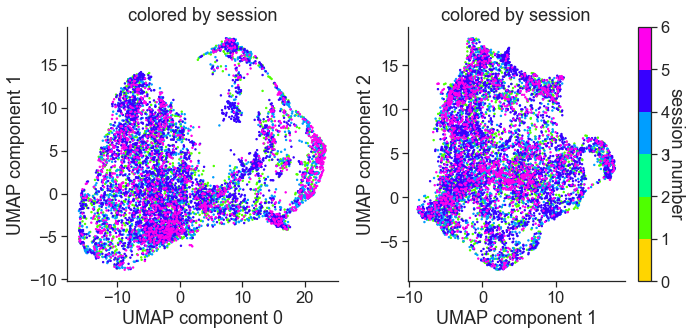

In [39]:
data.session_number = [int(session_type[6]) for session_type in data.session_type.values]
c_value = data.session_number.values
vmin = 0
vmax = 6
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette('hsv', 6).as_hex())
title = 'colored by session'
label = 'session_number'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

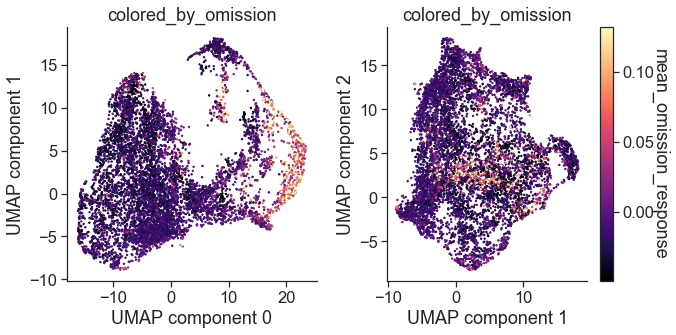

In [40]:
c_value = data.omission_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
label = 'mean_omission_response'
title = 'colored_by_omission'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

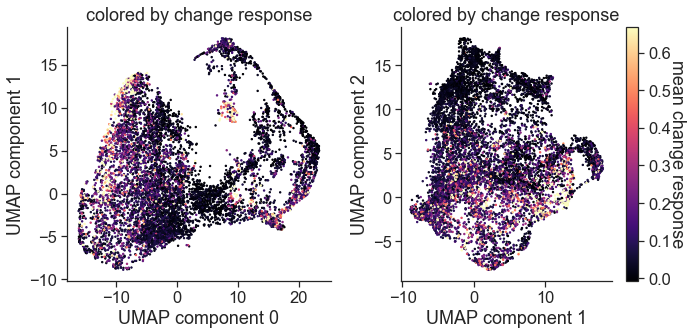

In [41]:
c_value = data.change_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
title = 'colored by change response'
label = 'mean change response'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)

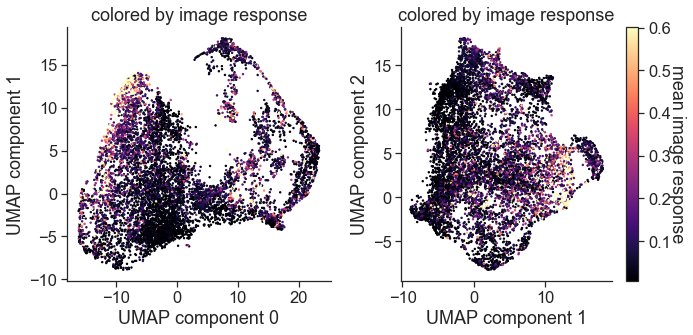

In [42]:
c_value = data.image_response.values
vmin = np.percentile(c_value, 5)
vmax = np.percentile(c_value, 95)
cmap = 'magma'
title = 'colored by image response'
label = 'mean image response'

plot_UMAP_2D(embedding, c_value, cmap, vmin, vmax, label, title)